# Epidemiology Project – Logistic Growth + Basic SIR Model
### Example: Flu spreading in a hostel of 1000 students
---


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Part 1: Logistic growth model (your hostel example)

In [2]:
# Logistic growth model (your hostel example)

# Parameters from the example
N_total = 1000          # total students
I0 = 1                  # initial infected
I_observed_day4 = 50    # observed value at t=4

# From the solved equation:  N(t) = K / (1 + (K/I0 - 1) * exp(-r t))
# We already know r ≈ 0.9906 from matching N(4) = 50

r = 0.9906              # growth rate (per day)
K = N_total             # carrying capacity

# Time points (days)
t = np.arange(0, 11, 1)   # 0 to 10 days


In [3]:
# Logistic function
def logistic_growth(t, I0, r, K):
    return K / (1 + (K/I0 - 1) * np.exp(-r * t))

In [4]:
# Calculate number of infected students
infected = logistic_growth(t, I0, r, K)

In [5]:
# Print table like the one in your project
print("Day | Infected students")
print("----|------------------")
for day, num in zip(t[4:11], infected[4:11]):
    print(f"{int(day):3d} | {round(num):4d}")

Day | Infected students
----|------------------
  4 |   50
  5 |  124
  6 |  276
  7 |  507
  8 |  735
  9 |  882
 10 |  953


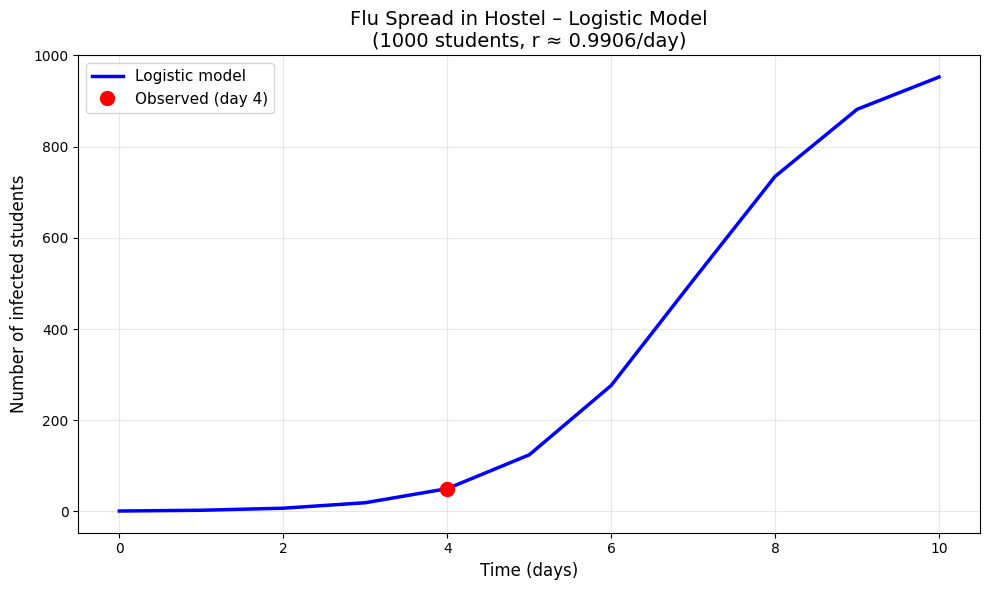

In [6]:
# Plot the logistic curve
# ────────────────────────────────────────────────
plt.figure(figsize=(10, 6))

plt.plot(t, infected, 'b-', linewidth=2.5, label='Logistic model')
plt.plot(4, 50, 'ro', ms=10, label='Observed (day 4)')

plt.title("Flu Spread in Hostel – Logistic Model\n(1000 students, r ≈ 0.9906/day)", fontsize=14)
plt.xlabel("Time (days)", fontsize=12)
plt.ylabel("Number of infected students", fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)

# Optional: add horizontal line at herd immunity threshold (if R0 known)
# plt.axhline(y=1000*(1-1/2.5), color='gray', ls='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Part 2: Basic SIR model (for comparison / extension)

In [7]:
def sir_model(y, t, beta, gamma, N):
    S, I, R = y
    dSdt = -beta * S * I / N      # usually written with /N for density dependence
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

In [8]:
# Example parameters (tune them!)
N = 1000.0
I0_sir = 1.0
R0_sir = 0.0
S0_sir = N - I0_sir - R0_sir

# Choose beta and gamma so that R0 ≈ 2–3 (realistic for flu)
R0_value = 2.5
gamma = 0.25      # ≈ 1/4 days⁻¹  → average infectious period = 4 days
beta = R0_value * gamma

# Time points
t_sir = np.linspace(0, 40, 400)

# Initial conditions
y0 = [S0_sir, I0_sir, R0_sir]

In [9]:
# Solve ODE
solution = odeint(sir_model, y0, t_sir, args=(beta, gamma, N))

S, I, R = solution.T

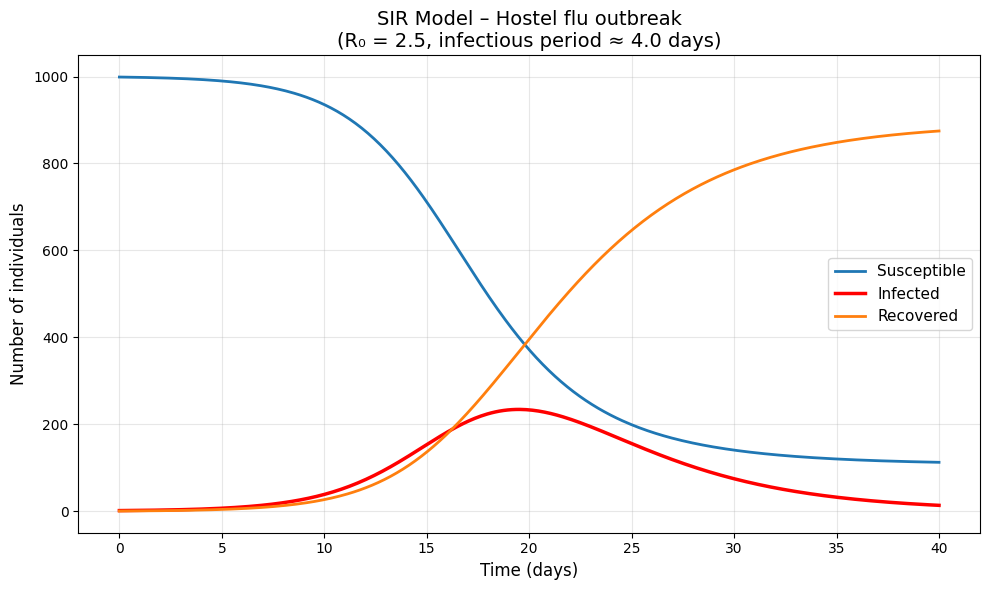

In [11]:
# Plot SIR
plt.figure(figsize=(10, 6))
plt.plot(t_sir, S, label='Susceptible', lw=2)
plt.plot(t_sir, I,  label='Infected',    lw=2.5, color='red')
plt.plot(t_sir, R,  label='Recovered',   lw=2)

plt.title(f"SIR Model – Hostel flu outbreak\n(R₀ = {R0_value:.1f}, infectious period ≈ {1/gamma:.1f} days)", fontsize=14)
plt.xlabel("Time (days)", fontsize=12)
plt.ylabel("Number of individuals", fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()



In [10]:
print("\nDone. You can now:")
print("1. Change r, beta, gamma values")
print("2. Add vaccination (reduce S0)")
print("3. Compare logistic vs SIR curves")


Done. You can now:
1. Change r, beta, gamma values
2. Add vaccination (reduce S0)
3. Compare logistic vs SIR curves
